## Nanostring

In [ ]:
library(survival)

In [ ]:
j <- read.csv('/data/users/gb/Asan/survival/nanostring/Rawdata/nano_log_value.csv',header = T)
j2 <- read.csv('/data//users/gb/Asan/survival/nanostring/Nanostring_all_2.csv')

In [41]:
j <- j[-1]
rownames(j) <- 1:55

In [42]:
j$time <- j2$year_time
j$RELAPSE <- j2$RELAPSE
j$pCR <- j2$pCR
j$DEATH <- j2$DEATH

In [69]:
u <-c('BCL2','C4BPA','CCL5','CCL20','CCL7','CSF2RB','MARCO','VCAM1','DEATH','time') 

In [107]:
head(j[u])

PDCD2,CCL5,LY96,CXCR4,FCGRT,PPBP,PTPN2,IL1RL2,LGALS3,KIT,⋯,NFKB1,CD24,CD74,STAT2,SMAD5,RAG1,IL2RA,POU2F2,DEATH,time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
5.383853,9.445557,7.295345,9.560199,10.259659,3.746527,7.734727,4.330869,9.675090,5.891058,⋯,6.828682,12.53711,13.96763,9.983145,7.191648,3.836403,6.355645,6.371469,0,7.694167
5.961291,13.628425,7.000270,10.595083,9.744708,3.760086,8.235315,3.984216,8.787998,6.388323,⋯,7.851195,13.15846,13.25495,10.237168,7.418461,4.492445,10.642732,6.266411,0,7.597500
7.761137,9.589982,7.123196,9.458823,9.861965,4.829851,8.717615,4.521546,10.088880,5.928495,⋯,6.962516,13.69958,13.78413,10.011721,8.084156,4.673762,7.950796,6.555815,0,6.600000
5.789617,11.387475,8.163480,9.264026,10.526540,4.377059,7.771691,4.512808,9.614217,6.316640,⋯,6.873444,12.12677,14.23266,10.640004,6.979052,3.204238,6.426482,6.968017,0,6.555833
6.064914,10.920397,7.624080,9.345298,9.829867,3.539603,8.193471,4.885298,10.337365,5.643496,⋯,6.913199,12.36682,14.04184,10.470357,7.111907,4.011922,7.122093,6.391519,0,6.330833
6.443559,9.606598,7.319582,9.949535,10.194949,3.524364,8.014685,4.767189,9.913355,8.036914,⋯,7.222435,13.04158,13.44011,10.349292,7.667602,3.837505,5.494632,6.556189,0,5.847500


In [108]:
res.cox.death <- coxph(Surv(time, DEATH) ~ . ,data =  j[u])

summary(res.cox.death)

Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”

Call:
coxph(formula = Surv(time, DEATH) ~ ., data = j[u])

  n= 55, number of events= 21 

                                 coef   exp(coef)    se(coef)      z Pr(>|z|)
PDCD2                       2.204e+02   5.443e+95   9.069e+02  0.243    0.808
CCL5                       -4.391e+01   8.544e-20   4.704e+02 -0.093    0.926
LY96                        1.377e+02   6.322e+59   1.337e+03  0.103    0.918
CXCR4                       1.069e+02   2.739e+46   8.605e+02  0.124    0.901
FCGRT                       2.537e+02  1.469e+110   1.162e+03  0.218    0.827
PPBP                        4.598e+01   9.314e+19   4.054e+02  0.113    0.910
PTPN2                      -3.365e+02  6.907e-147   9.658e+02 -0.348    0.727
IL1RL2                     -2.008e+02   5.973e-88   6.404e+02 -0.314    0.754
LGALS3                     -3.157e+02  7.607e-138   7.930e+02 -0.398    0.691
KIT                         6.062e+01   2.133e+26   3.596e+02  0.169    0.866
FCAR                       -2.025e+02   1.081e-88  

In [82]:
fit <- survfit(res.cox.death)
death_times <- fit$time
surv_prob <- data.frame(fit$surv)
avg_prob <-  rowMeans(as.matrix(surv_prob))

In [83]:
j3 <- j[c(which(j$RELAPSE==1)),]

In [84]:
fit1 <- survfit(res.cox.death, newdata = j3[u[c(3,4:5)]])

death_times.2 <- fit1$time
surv_prob.2 <- data.frame(fit1$surv)
avg_prob.2 <-  rowMeans(as.matrix(surv_prob.2))

ERROR: Error in eval(predvars, data, env): object 'VTN' not found


In [122]:
j4 <- j[c(which(j$RELAPSE==0)),]

In [136]:
fit2 <- survfit(res.cox.death, newdata = j4[u[c(3,4:5)]])

death_times.3 <- fit2$time
surv_prob.3 <- data.frame(fit2$surv)
avg_prob.3 <-  rowMeans(as.matrix(surv_prob.3))

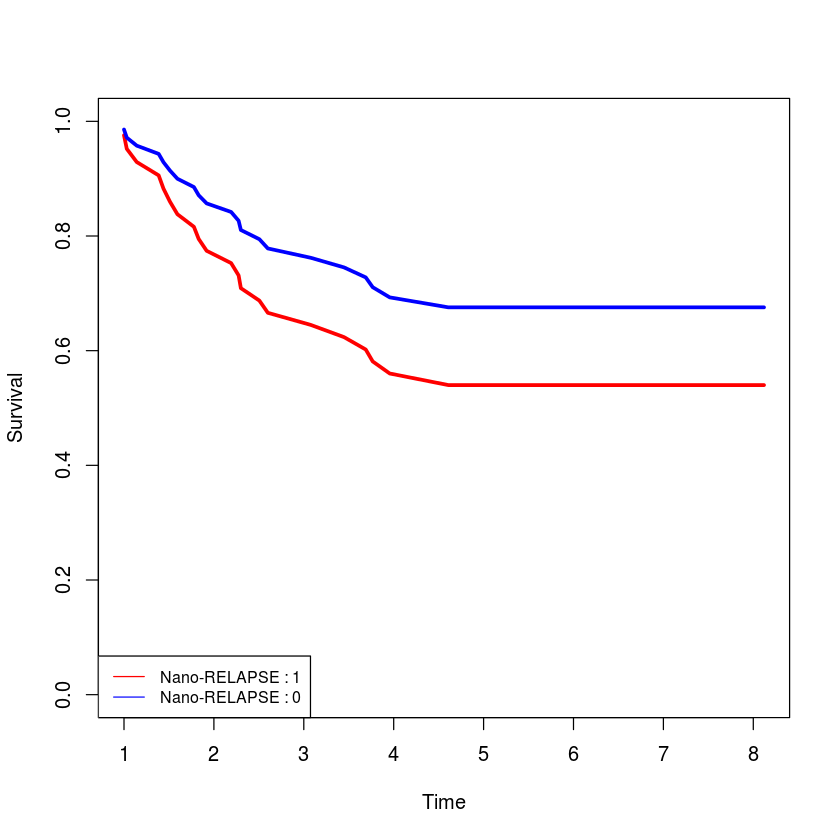

In [137]:
plot(death_times.2,avg_prob.2, ylab="Survival", xlab="Time",type = 'l',ylim = c(0,1),col='red',lwd = 3)

lines(death_times.3,avg_prob.3, 
      col = "blue",
      xlab = "Days",
      ylab = "survival",
      type="l",
      lty = 1,
      lwd = 3, 
      main = paste("prediction:cox model", 'pCR-0', sep=""))
legend("bottomleft", legend = c('Nano-RELAPSE : 1','Nano-RELAPSE : 0'),
       col=c('red','blue'), lty=1, cex=0.8)

In [14]:
j <- read.csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/X_train_data.csv',header = T,sep = '\t')
j.info <- read.csv('/data//users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/Y_train_info_2.csv')
j2 <- read.csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/X_test_data.csv',header = T,sep = '\t')
j2.info <- read.csv('/data//users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/Y_test_info_2.csv')

[1] X53 X5  X32 X54 X48 X40 X39 X12 X13 X6  X15 X11 X22 X35 X19 X14 X36 X43 X38
[20] X25 X51 X21 X45 X37 X28 X50 X42 X41 X46 X26 X55 X2  X29 X31 X1  X8  X24 X52
38 Levels: X1 X11 X12 X13 X14 X15 X19 X2 X21 X22 X24 X25 X26 X28 X29 ... X8

In [18]:
rownames(j) <- j[,1]
rownames(j2) <- j2[,1]

In [20]:
j$time <- j.info$year_time
j$RELAPSE <- j.info$RELAPSE
j$pCR <- j.info$pCR
#j$Miller.Payne_grade <- j2$Miller.Payne_grade
#j$RCB <- j2$RCB
j$DEATH <- j.info$DEATH

In [19]:
j2$time <- j2.info$year_time
j2$RELAPSE <- j2.info$RELAPSE
j2$pCR <- j2.info$pCR
#j$Miller.Payne_grade <- j2$Miller.Payne_grade
#j$RCB <- j2$RCB
j2$DEATH <- j2.info$DEATH

In [30]:
library(survival)

In [273]:
#u <-c('CCL5', 'CD1A', 'GNLY', 'FCER1A', 'CCL20', 'SELE','DEATH','time') #pCR
#u <-c('IL17B', 'EDNRB', 'TGFBI','DEATH','time') # RELAPSE
#u <- c('CCL5','CCL7','CCL8','CLEC4E','EDNRB','FCER1A','IL17B','IL2RA','TNFSF13B','CSF2RB','TGFBI','GZMB','SELE','time','DEATH') #RELAPSE
u <- c('C4A.B', 'CCL5', 'CD1A', 'CCL20', 'FCER1A', 'GNLY', 'IL2RA','S100A9','SELE','DEATH','time') #pCR

In [274]:
u[c(2,3,4,5,6,8,9,10:11)] #pCR
#u[c(2,5,7,11,13,14:15)] #RELAPSE

[1] "CCL5"   "CD1A"   "CCL20"  "FCER1A" "GNLY"   "S100A9" "SELE"   "DEATH" 
[9] "time"

In [286]:
res.cox.death <- coxph(Surv(time, DEATH) ~ . ,data =  j[u[c(5,10:11)]])

summary(res.cox.death)

Call:
coxph(formula = Surv(time, DEATH) ~ ., data = j[u[c(5, 10:11)]])

  n= 38, number of events= 17 

         coef exp(coef) se(coef)     z Pr(>|z|)   
FCER1A 0.5106    1.6663   0.1933 2.641  0.00827 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
FCER1A     1.666     0.6001     1.141     2.434

Concordance= 0.677  (se = 0.061 )
Likelihood ratio test= 6.86  on 1 df,   p=0.009
Wald test            = 6.97  on 1 df,   p=0.008
Score (logrank) test = 7.1  on 1 df,   p=0.008


In [287]:
fit <- survfit(res.cox.death)
death_times <- fit$time
surv_prob <- data.frame(fit$surv)
avg_prob <-  rowMeans(as.matrix(surv_prob))

In [288]:
fit1 <- survfit(res.cox.death, newdata = j2[u[c(5,10:11)]])

death_times.2 <- fit1$time
surv_prob.2 <- data.frame(fit1$surv)
avg_prob.2 <-  rowMeans(as.matrix(surv_prob.2))

In [289]:
j3.train <- j[c(which(j$pCR==0)),]
j3.test <- j[c(which(j$pCR==0)),]
j4.train <- j2[c(which(j2$pCR==1)),]
j4.test <- j2[c(which(j2$pCR==1)),]

In [290]:
fit2.train <- survfit(res.cox.death, newdata = j3.train[u[c(5,10:11)]])
fit2.test <- survfit(res.cox.death, newdata = j3.test[u[c(5,10:11)]])

death_times.3.train <- fit2.train$time
surv_prob.3.train <- data.frame(fit2.train$surv)
avg_prob.3.train <-  rowMeans(as.matrix(surv_prob.3.train))
death_times.3.test <- fit2.test$time
surv_prob.3.test <- data.frame(fit2.test$surv)
avg_prob.3.test <-  rowMeans(as.matrix(surv_prob.3.test))

In [291]:
fit3.train <- survfit(res.cox.death, newdata = j4.train[u[c(5,10:11)]])
fit3.test <- survfit(res.cox.death, newdata = j4.test[u[c(5,10:11)]])

death_times.4.train <- fit3.train$time
surv_prob.4.train <- data.frame(fit3.train$surv)
avg_prob.4.train <-  rowMeans(as.matrix(surv_prob.4.train))
death_times.4.test <- fit3.test$time
surv_prob.4.test <- data.frame(fit3.test$surv)
avg_prob.4.test <-  rowMeans(as.matrix(surv_prob.4.test))

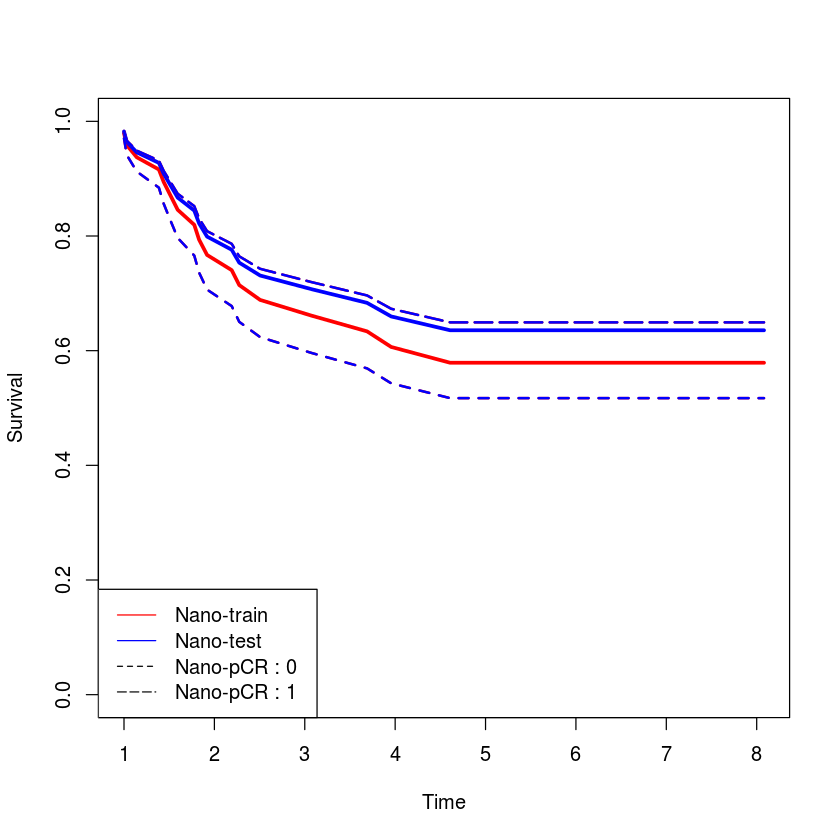

In [292]:
plot(death_times,avg_prob, ylab="Survival", xlab="Time",type = 'l',ylim = c(0,1),col='red',lwd = 3)

lines(death_times.2,avg_prob.2, 
      col = "blue",
      xlab = "Days",
      ylab = "survival",
      type="l",
      lty = 1,
      lwd = 3, 
      main = paste("prediction:cox model", 'pCR-0', sep=""))
lines(death_times.3.train,avg_prob.3.train, 
      col = "red",
      xlab = "Days",
      ylab = "survival",
      type="l",
      lty = 2,
      lwd = 2, 
      main = paste("prediction:cox model", 'pCR-0', sep=""))
lines(death_times.4.train,avg_prob.4.train, 
      col = "red",
      xlab = "Days",
      ylab = "survival",
      type="l",
      lty = 5,
      lwd = 2, 
      main = paste("prediction:cox model", 'pCR-0', sep=""))
lines(death_times.3.test,avg_prob.3.test, 
      col = "blue",
      xlab = "Days",
      ylab = "survival",
      type="l",
      lty = 2,
      lwd = 2, 
      main = paste("prediction:cox model", 'pCR-0', sep=""))
lines(death_times.4.test,avg_prob.4.test, 
      col = "blue",
      xlab = "Days",
      ylab = "survival",
      type="l",
      lty = 5,
      lwd = 2, 
      main = paste("prediction:cox model", 'pCR-0', sep=""))
legend("bottomleft", legend = c('Nano-train','Nano-test','Nano-pCR : 0','Nano-pCR : 1'),
       col=c('red','blue','black','black'), lty=c(1,1,2,5), cex=1)

In [122]:
j4 <- j[c(which(j$RELAPSE==0)),]

In [136]:
fit2 <- survfit(res.cox.death, newdata = j4[u[c(3,4:5)]])

death_times.3 <- fit2$time
surv_prob.3 <- data.frame(fit2$surv)
avg_prob.3 <-  rowMeans(as.matrix(surv_prob.3))

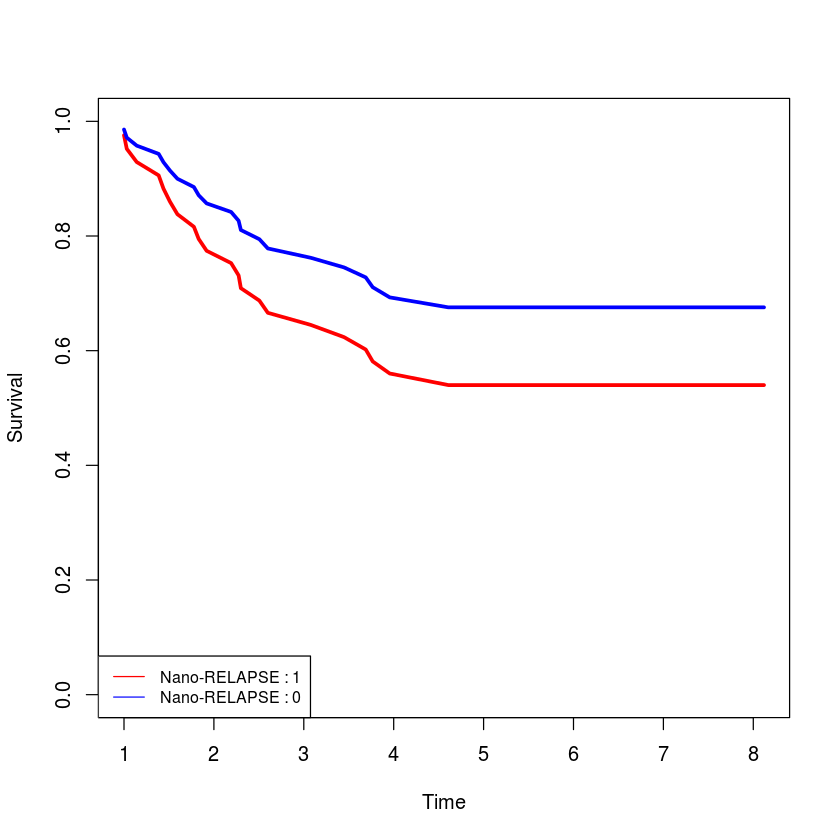

In [137]:
plot(death_times.2,avg_prob.2, ylab="Survival", xlab="Time",type = 'l',ylim = c(0,1),col='red',lwd = 3)

lines(death_times.3,avg_prob.3, 
      col = "blue",
      xlab = "Days",
      ylab = "survival",
      type="l",
      lty = 1,
      lwd = 3, 
      main = paste("prediction:cox model", 'pCR-0', sep=""))
legend("bottomleft", legend = c('Nano-RELAPSE : 1','Nano-RELAPSE : 0'),
       col=c('red','blue'), lty=1, cex=0.8)

In [42]:
predict(res.cox.death,newdata = j2[u[c(3,4:5)]],type = "lp")
predict(res.cox.death,newdata = j2[u[c(3,4:5)]],type = "risk")
predict(res.cox.death,newdata = j2[u[c(3,4:5)]],type = "terms")
predict(res.cox.death,newdata = j2[u[c(3,4:5)]],type = "expected")

X34         X27         X10         X16          X9         X44 
 0.34909250  0.51239489 -0.17837743 -0.46057845  0.27859894  0.04210991 
         X7          X4         X33          X3         X30         X49 
-0.01128672 -0.13922924  0.07322614 -0.61589731 -0.60648052 -0.19361107 
        X23         X47         X18         X20         X17 
 0.59158423  0.23139764 -0.06743875 -0.68115477 -0.30848985

X34       X27       X10       X16        X9       X44        X7        X4 
1.4177803 1.6692842 0.8366266 0.6309186 1.3212773 1.0430091 0.9887767 0.8700286 
      X33        X3       X30       X49       X23       X47       X18       X20 
1.0759738 0.5401560 0.5452665 0.8239783 1.8068486 1.2603603 0.9347850 0.5060323 
      X17 
0.7345554

,TGFBI
X34,0.34909250
X27,0.51239489
X10,-0.17837743
X16,-0.46057845
X9,0.27859894
X44,0.04210991
X7,-0.01128672
X4,-0.13922924
X33,0.07322614
X3,-0.61589731


[1] 0.5419448 0.7791751 0.4672233 0.3523434 0.7378818 0.5824798 0.5521932
 [8] 0.4858770 0.6008894 0.3016560 0.3045101 0.4601597 0.7642471 0.7038620
[15] 0.3209363 0.2825993 0.4102205